# Integration Approximation

## Setup functionality

### Importing different libraries
numpy is a data science library
matplotlib is used for graphing
math is used for the equation

In [20]:
import numpy as np
import matplotlib.pyplot as plt
import math

### Calc class initiation
Building a class to save input variable to be used later:
Z: upper bound
A: lower bound
B: accuracy
fX: equation

### Area calculation function
Runs the equation with the bounds based on the last iteration's upper bound and the last iteration's upper bound plus the accuracy variable, this creates a box (technically a box with a triangle on top) to find the exact area

### Integrate function
loops through and sums cumulativly adds the areas of every box

### Graphing function
this function just sets up the code to graph the data and display the area

In [21]:
# Calc class initiation
class Calc:
    def __init__(self, upper_bound, lower_bound, accuracy, equation) -> None:
        self.Z = upper_bound
        self.A = lower_bound
        self.B = accuracy
        self.fX = equation
    
    # Area calculation function
    def Area(eq, acc, start):
        eq_start = eq.replace("x", f"({start})")
        fX = eval(eq_start)
        eq_end = eq.replace("x", f"({start + acc})")
        fXB = eval(eq_end)
        return ((fXB * acc) + (acc * (fX - fXB)))
    
    # Integrate function
    def Integrate(self):
        return sum([Calc.Area(self.fX, self.B, i) for i in np.arange(self.A, self.Z, self.B)])
    
    # Graphing function
    def Graph(self):
        x = np.arange(self.A, self.Z, self.B)
        y = [eval(self.fX.replace('x', str(val))) for val in x]
        plt.figure(figsize=(10, 6))
        plt.plot(x, y, label=f'y = {self.fX}', color='blue')
        plt.fill_between(x, y, 0, alpha=0.3)
        plt.title('Sine Function with Limits and Shading')
        plt.xlabel('x')
        plt.ylabel('y')
        plt.axhline(0, color='black',linewidth=0.5, ls='--')
        plt.axvline(self.A, color='red', ls='--', label=f'x = {self.A} (Limit Start)')
        plt.axvline(self.Z, color='red', ls='--', label=f'x = {self.Z} (Limit End)')
        plt.grid()
        plt.legend()
        plt.show()

## Set Parameters

In [22]:
c = Calc(
    (2*math.pi), # upper limit
    0, # lower limit
    0.00001, # accuracy
    "math.sin(x)+1") # equation

## Run and Graph

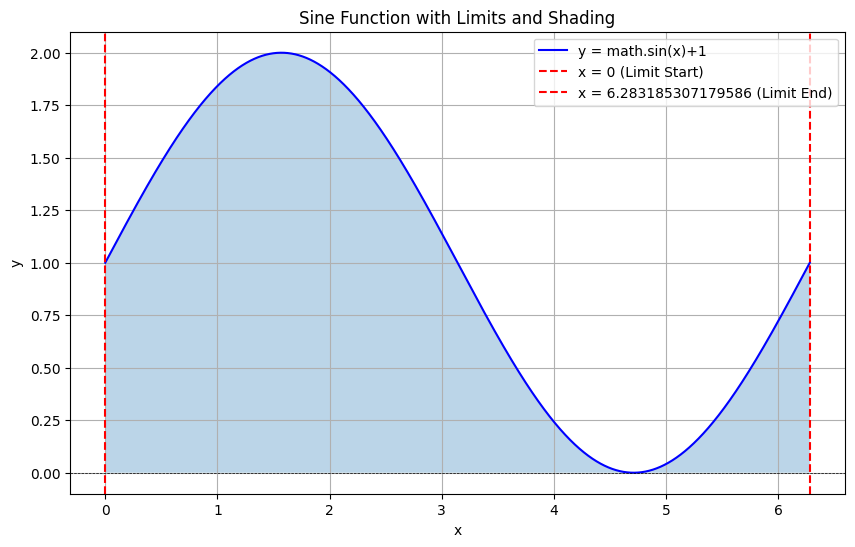

Accuracy: 1e-05
Area: 6.283189999987548
Number of Blocks: 628319


In [23]:
c.Graph()
print(f"Accuracy: {c.B}")
print(f"Area: {c.Integrate()}")
print(f"Number of Blocks: {len(np.arange(c.A, c.Z, c.B))}")
